In [44]:
''' main.ipynb: This is an interactive python notebook which demonstarte the usage of DecisionTree.py.
    Please open this file in an IDE(Googe colab, Jupyter Notebook) that supports ipynb files. 
       __author__      = Shanika Perera'''

' main.ipynb: This is an interactive python notebook which demonstarte the usage of DecisionTree.py.\n    Please open this file in an IDE(Googe colab, Jupyter Notebook) that supports ipynb files. \n       __author__      = Shanika Perera'

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from DecisionTree import DecisionTree
from sklearn import preprocessing
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
def accuracy(ytest, ypred):
    ''' calculate the accuracy from a test dataset
        - ytest is a dataframe that contain the actual labels of the test data
        - ypred is a dataframe that contain the predicted labels for the test data'''
    return np.sum(ytest == ypred) / len(ytest)

In [3]:
def feature_to_dummy(df, column, drop=False):
    ''' take a serie from a dataframe,
        convert it to dummy and name it like feature_value
        - df is a dataframe
        - column is the name of the column to be transformed
        - if drop is true, the serie is removed from dataframe'''
    tmp = pd.get_dummies(df[column], prefix=column, prefix_sep='_')
    df = pd.concat([df, tmp], axis=1)
    if drop:
        del df[column]
    return df

In [4]:
def getEncoded(test_data,labelencoder_dict,onehotencoder_dict):
    test_encoded_x = None
    for i in range(0,test_data.shape[1]):
        label_encoder =  labelencoder_dict[i]
        feature = label_encoder.transform(test_data.iloc[:,i])
        feature = feature.reshape(test_data.shape[0], 1)
        onehot_encoder = onehotencoder_dict[i]
        feature = onehot_encoder.transform(feature)
        if test_encoded_x is None:
            test_encoded_x = feature
        else:
            test_encoded_x = np.concatenate((test_encoded_x, feature), axis=1)
    return test_encoded_x

In [5]:
MY_PATH = ''
train_data_file = MY_PATH + 'restaurant.csv'
test_data_file = MY_PATH + 'restaurant_test.csv'
predict_data_file = MY_PATH + 'restaurant_predict.csv'

## Data Preparation

In [6]:
# Column names to be added
column_names=['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type', 'Est', 'Output']

#read data
train_df=pd.read_csv(train_data_file, names=column_names)
test_df=pd.read_csv(test_data_file, names=column_names)
predict_df=pd.read_csv(predict_data_file, names=column_names)
predict_df = predict_df.drop('Output', axis=1) 

### Train Data Preparation

In [7]:
train_df.dtypes

Alt       object
Bar       object
Fri       object
Hun       object
Pat       object
Price     object
Rain      object
Res       object
Type      object
Est       object
Output    object
dtype: object

In [8]:
#removing spaces in string values
train_df_dtypes_obj = train_df.select_dtypes(['object'])
train_df[train_df_dtypes_obj.columns] = train_df_dtypes_obj.apply(lambda x: x.str.strip())

In [9]:
# mapping yes/no to 1/0
# train_df['Output'] = train_df['Output'].map({'Yes': int(1), 'No': int(0)})

In [10]:
train_df.head()

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Output
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


In [11]:
train_df.shape

(12, 11)

In [12]:
#separateing predictor features(X) and target feature(y)
X_train = train_df.iloc[:,0:10]
y_train = train_df.iloc[:,10]

In [13]:
X_train_dichot =  X_train.loc[:, ["Alt", "Bar", "Fri", "Hun", "Rain", "Res"]]
X_train_nominal = X_train.loc[:, ["Pat", "Price", "Type", "Est"]]

In [14]:
# label Encoding the dichotomous variables
X_train_dichot_en = X_train_dichot.apply(LabelEncoder().fit_transform)

In [15]:
# onehot encoding the nominal categorical variables
labelencoder_dict = {}
onehotencoder_dict = {}
X_train_nominal_en = None
for i in range(0, X_train_nominal.shape[1]):
    label_encoder = LabelEncoder()
    labelencoder_dict[i] = label_encoder
    feature = label_encoder.fit_transform(X_train_nominal.iloc[:,i])
    feature = feature.reshape(X_train_nominal.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    onehotencoder_dict[i] = onehot_encoder
    if X_train_nominal_en is None:
        X_train_nominal_en = feature
    else:
        X_train_nominal_en = np.concatenate((X_train_nominal_en, feature), axis=1)

In [16]:
# concatenating te two arrays
X_train_dichot_en = X_train_dichot_en.to_numpy()
X_train = np.concatenate((X_train_dichot_en, X_train_nominal_en),axis=1)

In [17]:
X_train

array([[1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        1., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1.],
       [1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [18]:
feature_names=['Alt', 'Bar', 'Fri', 'Hun', 'Rain', 'Res', 'Pat_Full', 'Pat_None', 'Pat_Some', 'Price_$', 'Price_$$', 'Price_$$$', 'Type_Burger', 'Type_French', 'Type_Italian', 'Type_Thai', 'Est_0-10', 'Est_10-30', 'Est_30-60', 'Est_>60']

In [19]:
# for visualizaation
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_train_df

,Alt,Bar,Fri,Hun,Rain,Res,Pat_Full,Pat_None,Pat_Some,Price_$,Price_$$,Price_$$$,Type_Burger,Type_French,Type_Italian,Type_Thai,Est_0-10,Est_10-30,Est_30-60,Est_>60
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
# label encoding the y_train
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)

In [21]:
y_train

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

### Test Data Preparation

In [22]:
#removing white spaces
test_df_dtypes_obj = test_df.select_dtypes(['object'])
test_df[test_df_dtypes_obj.columns] = test_df_dtypes_obj.apply(lambda x: x.str.strip())

In [23]:
test_df.head()

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Output
0,No,No,No,No,None,$$$,No,No,Thai,0-10,No
1,No,No,Yes,Yes,Full,$,Yes,No,Burger,10-30,Yes
2,Yes,No,No,No,Full,$$,Yes,No,French,0-10,No


In [24]:
#separating predictor features(X) and target feature(y)
X_test = test_df.iloc[:,0:10]
y_test = test_df.iloc[:,10]

In [25]:
X_test_dichot =  X_test.loc[:, ["Alt", "Bar", "Fri", "Hun", "Rain", "Res"]]
X_test_nominal = X_test.loc[:, ["Pat", "Price", "Type", "Est"]]

In [26]:
# label Encoding the dichotomous variables
X_test_dichot_en = X_test_dichot.apply(LabelEncoder().fit_transform)

In [27]:
# one hot encoding the nominal categorical variables
X_test_nominal_en = getEncoded(X_test_nominal, labelencoder_dict, onehotencoder_dict)

In [28]:
# concatenating the two arrays
X_test_dichot_en = X_test_dichot_en.to_numpy()
X_test = np.concatenate((X_test_dichot_en, X_test_nominal_en),axis=1)

In [29]:
X_test

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 0., 0., 0.]])

In [30]:
# for visualization
X_test_df = pd.DataFrame(X_test, columns=feature_names)
X_test_df

,Alt,Bar,Fri,Hun,Rain,Res,Pat_Full,Pat_None,Pat_Some,Price_$,Price_$$,Price_$$$,Type_Burger,Type_French,Type_Italian,Type_Thai,Est_0-10,Est_10-30,Est_30-60,Est_>60
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
y_test = le.fit_transform(y_test)

In [32]:
y_test

array([0, 1, 0])

### Predict Data Preparation

In [33]:
predict_df_dtypes_obj = predict_df.select_dtypes(['object'])
predict_df[predict_df_dtypes_obj.columns] = predict_df_dtypes_obj.apply(lambda x: x.str.strip())

In [34]:
predict_df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est
0,No,No,No,No,None,$$$,No,No,Thai,0-10
1,No,No,No,No,None,$$$,Yes,No,Burger,10-30
2,No,No,No,No,None,$,Yes,No,French,0-10


In [35]:
predict_df_nominal = predict_df.loc[:, ["Pat", "Price", "Type", "Est"]]
predict_df_dichot =  predict_df.loc[:, ["Alt", "Bar", "Fri", "Hun", "Rain", "Res"]]

In [36]:
# label Encoding the dichotomous variables
predict_df_dichot_en =predict_df_dichot.apply(LabelEncoder().fit_transform)

In [37]:
predict_df_nominal_en = getEncoded(predict_df_nominal, labelencoder_dict, onehotencoder_dict)

In [38]:
predict_df_dichot_en = predict_df_dichot_en.to_numpy()
X_predict = np.concatenate((predict_df_dichot_en, predict_df_nominal_en),axis=1)

In [39]:
X_predict

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0.]])

## Training

In [40]:
clf = DecisionTree()
clf.fit(X_train, y_train)

In [41]:
clf.print_information_gain_results(feature_names)

Depth: 0 - Split: 1
	Feature: Est_10-30
		Threshold: 0.0 Gain: 0.0
		Threshold: 1.0 Gain: 0
	Feature: Hun
		Threshold: 0.0 Gain: 0.136
		Threshold: 1.0 Gain: 0
	Feature: Price_$$$
		Threshold: 0.0 Gain: 0.019
		Threshold: 1.0 Gain: 0
	Feature: Pat_Some
		Threshold: 0.0 Gain: 0.318
		Threshold: 1.0 Gain: 0
	Feature: Pat_None
		Threshold: 0.0 Gain: 0.132
		Threshold: 1.0 Gain: 0
	Feature: Type_Burger
		Threshold: 0.0 Gain: 0.0
		Threshold: 1.0 Gain: 0
	Feature: Est_0-10
		Threshold: 0.0 Gain: 0.057
		Threshold: 1.0 Gain: 0
	Feature: Pat_Full
		Threshold: 0.0 Gain: 0.057
		Threshold: 1.0 Gain: 0
	Feature: Type_Italian
		Threshold: 0.0 Gain: 0.0
		Threshold: 1.0 Gain: 0
	Feature: Est_30-60
		Threshold: 0.0 Gain: 0.0
		Threshold: 1.0 Gain: 0
	Feature: Rain
		Threshold: 0.0 Gain: 0.0
		Threshold: 1.0 Gain: 0
	Feature: Fri
		Threshold: 0.0 Gain: 0.014
		Threshold: 1.0 Gain: 0
	Feature: Est_>60
		Threshold: 0.0 Gain: 0.132
		Threshold: 1.0 Gain: 0
	Feature: Price_$
		Threshold: 0.0 Gain: 0.014

## Visualization of the Decision Tree

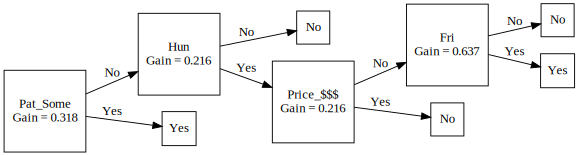

In [42]:
tree = clf.visualize_tree(feature_names)
tree

## Testing

In [43]:
test_df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Output
0,No,No,No,No,None,$$$,No,No,Thai,0-10,No
1,No,No,Yes,Yes,Full,$,Yes,No,Burger,10-30,Yes
2,Yes,No,No,No,Full,$$,Yes,No,French,0-10,No


In [44]:
test_predictions = clf.predict(X_test)

In [45]:
test_predictions

array([0, 1, 0])

In [46]:
print("Test Results:\n")
for idx, pred in enumerate(test_predictions):
    if pred == 1:
        print("Example " + str(idx) + " - > Yes")
    else:
        print("Example " + str(idx) + " - > No")

Test Results:

Example 0 - > No
Example 1 - > Yes
Example 2 - > No


In [47]:
acc = accuracy(y_test, test_predictions)
print("Accuracy of testing:")
print(acc)

Accuracy of testing:
1.0


## Prediction of Unseen Data

In [48]:
predictions = clf.predict(X_predict)

In [49]:
predictions

array([0, 0, 0])

In [50]:
print("Predictions:\n")
for idx, pred in enumerate(predictions):
    if pred == 1:
        print("Example " + str(idx) + " - > Yes")
    else:
        print("Example " + str(idx) + " - > No")

Predictions:

Example 0 - > No
Example 1 - > No
Example 2 - > No
